# DS6040 Project  
## Climate Change Data

In [1]:
import pyreadstat
import pandas as pd
from pandas_profiling import ProfileReport

C:\Users\elena\AppData\Local\Temp\ipykernel_5384\1397413415.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df = pd.read_spss('spssdata.sav')

In [3]:
df.head()

,case_ID,wave,year,weight_wave,weight_aggregate,happening,cause_original,cause_other_text,cause_recoded,sci_consensus,...,employment,house_head,house_size,house_ages0to1,house_ages2to5,house_ages6to12,house_ages13to17,house_ages18plus,house_type,house_own
0,2.0,Nov 2008,2008,0.54,0.269626,Yes,Caused mostly by human activities,,Caused mostly by human activities,Most scientists think global warming is happening,...,Not working - retired,Not head of household,3.0,0.0,0.0,0.0,0.0,3.0,One-family house detached from any other house,Owned by you or someone in your household
1,3.0,Nov 2008,2008,0.85,0.424411,Don't know,Caused mostly by human activities,,Caused mostly by human activities,Don't know enough to say,...,Not working - disabled,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,Mobile home,Rented
2,5.0,Nov 2008,2008,0.49,0.244660,Don't know,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,There is a lot of disagreement among scientist...,...,Not working - looking for work,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household
3,6.0,Nov 2008,2008,0.29,0.144799,Yes,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,Most scientists think global warming is happening,...,Not working - retired,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household
4,7.0,Nov 2008,2008,1.29,0.644106,Yes,Caused mostly by human activities,,Caused mostly by human activities,There is a lot of disagreement among scientist...,...,Working - as a paid employee,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household


In [4]:
df.columns

Index(['case_ID', 'wave', 'year', 'weight_wave', 'weight_aggregate',
       'happening', 'cause_original', 'cause_other_text', 'cause_recoded',
       'sci_consensus', 'worry', 'harm_personally', 'harm_US',
       'harm_dev_countries', 'harm_future_gen', 'harm_plants_animals',
       'when_harm_US', 'reg_CO2_pollutant', 'reg_utilities', 'fund_research',
       'reg_coal_emissions', 'discuss_GW', 'hear_GW_media', 'gender', 'age',
       'age_category', 'generation', 'educ', 'educ_category', 'income',
       'income_category', 'race', 'ideology', 'party', 'party_w_leaners',
       'party_x_ideo', 'registered_voter', 'region9', 'region4', 'religion',
       'religion_other_nonchristian', 'evangelical', 'service_attendance',
       'marit_status', 'employment', 'house_head', 'house_size',
       'house_ages0to1', 'house_ages2to5', 'house_ages6to12',
       'house_ages13to17', 'house_ages18plus', 'house_type', 'house_own'],
      dtype='object')

In [5]:
df.shape

(30136, 54)

In [9]:
df.isna().sum()

case_ID                            0
wave                               0
year                               0
weight_wave                        0
weight_aggregate                   0
happening                          0
cause_original                     0
cause_other_text                   0
cause_recoded                      0
sci_consensus                   1330
worry                              0
harm_personally                    0
harm_US                            0
harm_dev_countries                 0
harm_future_gen                    0
harm_plants_animals             1330
when_harm_US                       0
reg_CO2_pollutant               1010
reg_utilities                   9123
fund_research                      0
reg_coal_emissions             14490
discuss_GW                         0
hear_GW_media                  13657
gender                             0
age                                0
age_category                       0
generation                         0
e

In [12]:
# creating bool series True for NaN values 
bool_series = pd.isnull(df['marit_status']) 
    
# filtering data 
# displaying data only with Gender = NaN 
nan_search = df[bool_series] 
nan_search

,case_ID,wave,year,weight_wave,weight_aggregate,happening,cause_original,cause_other_text,cause_recoded,sci_consensus,...,employment,house_head,house_size,house_ages0to1,house_ages2to5,house_ages6to12,house_ages13to17,house_ages18plus,house_type,house_own
27075,48001.0,Mar 2021,2021,0.5832,0.607664,Don't know,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,There is a lot of disagreement among scientist...,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,Owned by you or someone in your household
27076,48002.0,Mar 2021,2021,0.7256,0.756037,Yes,Caused mostly by human activities,,Caused mostly by human activities,There is a lot of disagreement among scientist...,...,NaN,NaN,8.0,NaN,NaN,NaN,NaN,7.0,NaN,Owned by you or someone in your household
27077,48003.0,Mar 2021,2021,0.7308,0.761456,Yes,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,Don't know enough to say,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,Owned by you or someone in your household
27078,48004.0,Mar 2021,2021,0.5975,0.622564,No,None of the above because global warming isn't...,,Neither because global warming isn't happening,There is a lot of disagreement among scientist...,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,Owned by you or someone in your household
27079,48005.0,Mar 2021,2021,0.6942,0.723320,No,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,Most scientists think global warming is not ha...,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,Owned by you or someone in your household
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30131,53046.0,Apr 2022,2022,1.4848,1.575959,Don't know,Caused mostly by natural changes in the enviro...,-1,Caused mostly by natural changes in the enviro...,There is a lot of disagreement among scientist...,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.0,NaN,Owned by you or someone in your household
30132,53047.0,Apr 2022,2022,0.8351,0.886371,Yes,Caused mostly by natural changes in the enviro...,-1,Caused mostly by natural changes in the enviro...,Most scientists think global warming is happening,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,Owned by you or someone in your household
30133,53048.0,Apr 2022,2022,1.0979,1.165305,Yes,Caused mostly by natural changes in the enviro...,-1,Caused mostly by natural changes in the enviro...,Don't know enough to say,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,Rented
30134,53049.0,Apr 2022,2022,0.6474,0.687147,No,Caused mostly by natural changes in the enviro...,-1,Caused mostly by natural changes in the enviro...,There is a lot of disagreement among scientist...,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,Owned by you or someone in your household


In [16]:
df.groupby('happening').happening.agg('count').sort_values(ascending=False)

happening
Yes           20438
Don't know     4935
No             4689
Refused          74
Name: happening, dtype: int64

In [17]:
df.columns

Index(['case_ID', 'wave', 'year', 'weight_wave', 'weight_aggregate',
       'happening', 'cause_original', 'cause_other_text', 'cause_recoded',
       'sci_consensus', 'worry', 'harm_personally', 'harm_US',
       'harm_dev_countries', 'harm_future_gen', 'harm_plants_animals',
       'when_harm_US', 'reg_CO2_pollutant', 'reg_utilities', 'fund_research',
       'reg_coal_emissions', 'discuss_GW', 'hear_GW_media', 'gender', 'age',
       'age_category', 'generation', 'educ', 'educ_category', 'income',
       'income_category', 'race', 'ideology', 'party', 'party_w_leaners',
       'party_x_ideo', 'registered_voter', 'region9', 'region4', 'religion',
       'religion_other_nonchristian', 'evangelical', 'service_attendance',
       'marit_status', 'employment', 'house_head', 'house_size',
       'house_ages0to1', 'house_ages2to5', 'house_ages6to12',
       'house_ages13to17', 'house_ages18plus', 'house_type', 'house_own'],
      dtype='object')

In [26]:
data_crosstab = pd.crosstab(df['happening'],
                            df['region9'], 
                               margins = False)
print(data_crosstab)

region9     East-North Central  East-South Central  Mid-Atlantic  Mountain  \
happening                                                                    
Don't know                 838                 368           623       339   
No                         783                 335           539       416   
Refused                     15                   4            10         7   
Yes                       3144                 928          2860      1517   

region9     New England  Pacific  South Atlantic  West-North Central  \
happening                                                              
Don't know          215      642             980                 396   
No                  185      594             891                 402   
Refused               4        9              12                   6   
Yes                1057     3411            3976                1481   

region9     West-South Central  
happening                       
Don't know                 534  

In [27]:
data_crosstab = pd.crosstab(df['happening'],
                            df['region4'], 
                               margins = False)
print(data_crosstab)

region4     Midwest  Northeast  South  West
happening                                  
Don't know     1234        838   1882   981
No             1185        724   1770  1010
Refused          21         14     23    16
Yes            4625       3917   6968  4928


In [20]:
df.groupby('worry').worry.agg('count').sort_values(ascending=False)

worry
Somewhat worried      11844
Not very worried       7626
Very worried           5531
Not at all worried     5052
Refused                  83
Name: worry, dtype: int64

In [21]:
df.groupby('harm_future_gen').harm_future_gen.agg('count').sort_values(ascending=False)

harm_future_gen
A great deal         14593
A moderate amount     5599
Not at all            3429
Don't know            3379
Only a little         3003
Refused                133
Name: harm_future_gen, dtype: int64

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

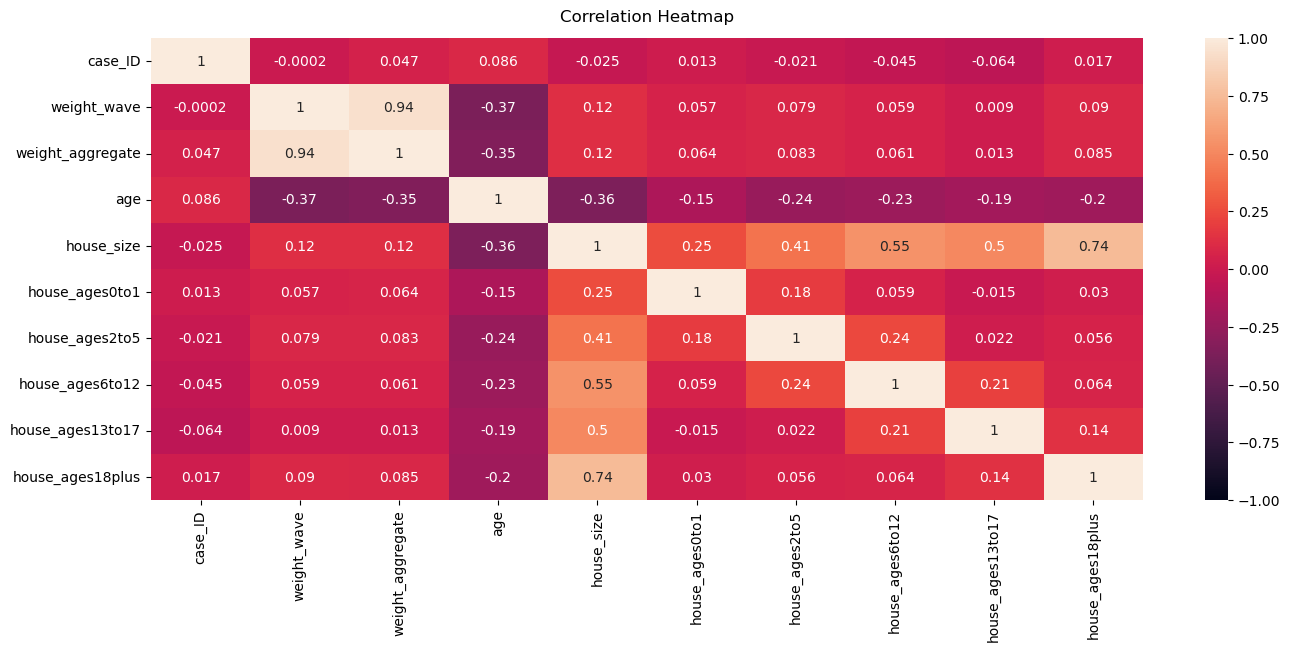

In [25]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [29]:
df.dtypes

case_ID                         float64
wave                           category
year                           category
weight_wave                     float64
weight_aggregate                float64
happening                      category
cause_original                 category
cause_other_text                 object
cause_recoded                  category
sci_consensus                  category
worry                          category
harm_personally                category
harm_US                        category
harm_dev_countries             category
harm_future_gen                category
harm_plants_animals            category
when_harm_US                   category
reg_CO2_pollutant              category
reg_utilities                  category
fund_research                  category
reg_coal_emissions             category
discuss_GW                     category
hear_GW_media                  category
gender                         category
age                             float64


In [30]:
df.groupby('generation').generation.agg('count').sort_values(ascending=False)

generation
Baby Boomers (1946 - 1964)    12177
Generation X (1965 - 1980)     7351
Millennials (1981 - 1996)      5873
Silent (1928 - 1945)           3954
iGen‎/Gen Z (1997 - )           614
Greatest (Before 1928)          167
Name: generation, dtype: int64

In [31]:
df.groupby('ideology').ideology.agg('count').sort_values(ascending=False)

ideology
Moderate, middle of the road    11994
Somewhat conservative            6635
Somewhat liberal                 5375
Very conservative                3317
Very liberal                     2224
Refused                           591
Name: ideology, dtype: int64

In [32]:
df.groupby('party').party.agg('count').sort_values(ascending=False)

party
Democrat                               9903
Republican                             8336
Independent                            7737
No party/not interested in politics    2992
Other; Please specify:                  859
Refused                                 309
Name: party, dtype: int64

In [34]:
sns.boxplot(x='party', y='happening', data=df,palette='rainbow')

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [33]:
sns.set(style="darkgrid")
sns.boxplot(x=df['party'],y=df['happening'])
plt.title("GW is happening vs Political Affiliation")
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.